# Import python libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Import dataset

In [6]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Describe the dataset to see statistical values

In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# To check for null values

In [9]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
data['ph'].fillna(data['ph'].mean(),inplace=True)

C:\Users\srija\AppData\Local\Temp\ipykernel_28764\1286531414.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ph'].fillna(data['ph'].mean(),inplace=True)


In [11]:
data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)

C:\Users\srija\AppData\Local\Temp\ipykernel_28764\2423934813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sulfate'].fillna(data['Sulfate'].mean(), inplace=True)


In [12]:
data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)

C:\Users\srija\AppData\Local\Temp\ipykernel_28764\3610724527.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean(), inplace=True)


In [13]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Handling Outliers**

In [14]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

features_to_check = ['ph', 'Sulfate', 'Trihalomethanes', 'Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Turbidity']
for feature in features_to_check:
    data = remove_outliers_iqr(data, feature)

**Exploratory Data Analysis**

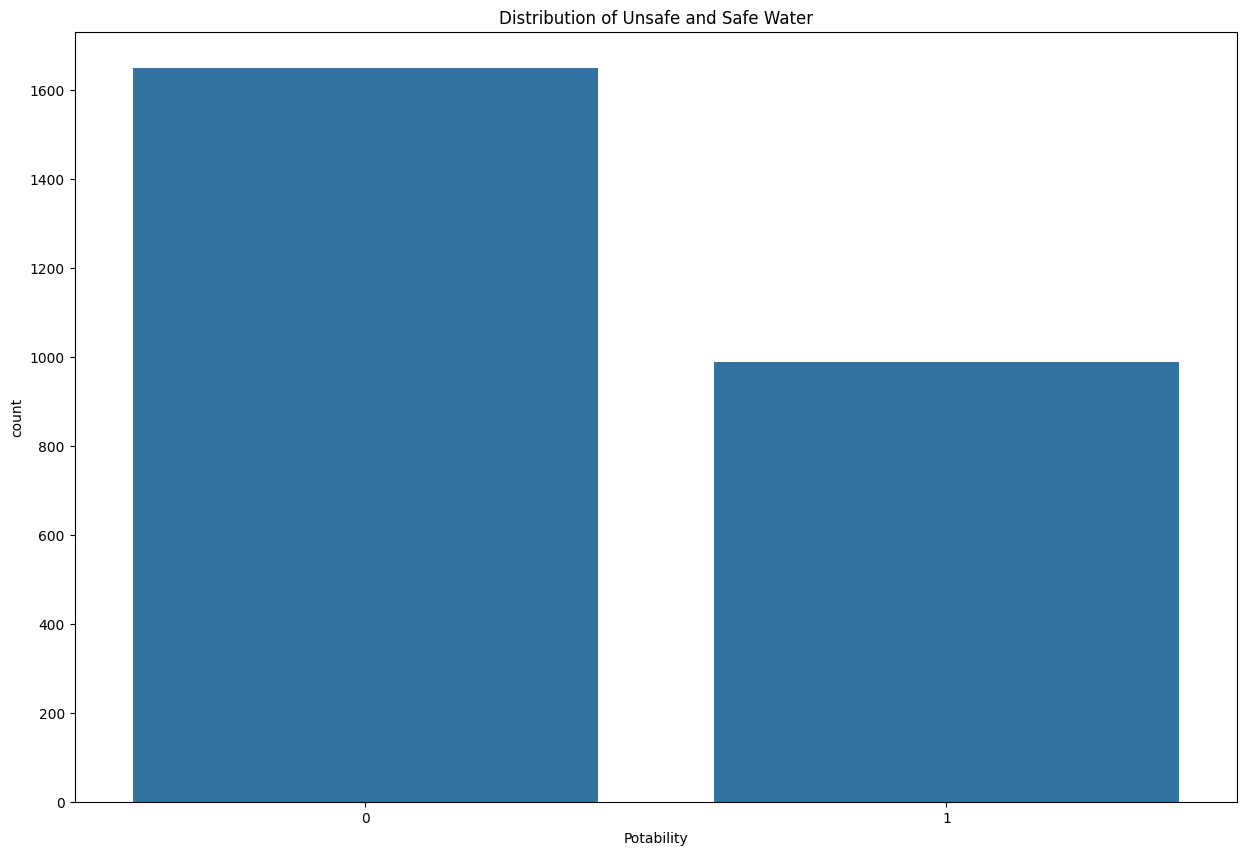

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Potability",data=data)
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [16]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: PH")
figure.show()

In [17]:
import plotly.express as px
figure = px.box(data, x='Potability', y='Hardness',
                title='Factors Affecting WateMedian pH:')

# Display the plot
figure.show()


In [18]:
figure = px.histogram(data, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids")
figure.show()

In [19]:
figure = px.histogram(data, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

In [20]:
figure = px.histogram(data, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

In [21]:
figure = px.histogram(data, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

In [22]:
figure = px.histogram(data, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon")
figure.show()

In [23]:

figure = px.histogram(data, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

In [24]:
figure = px.histogram(data, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity")
figure.show()

# Correlation of all the features with respect to the Potability column

In [25]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.134826
Organic_carbon     0.025745
Sulfate            0.014388
Trihalomethanes    0.013305
Conductivity      -0.001242
Potability        -0.012618
Turbidity         -0.043011
Chloramines       -0.067457
Solids            -0.082085
Name: ph, dtype: float64

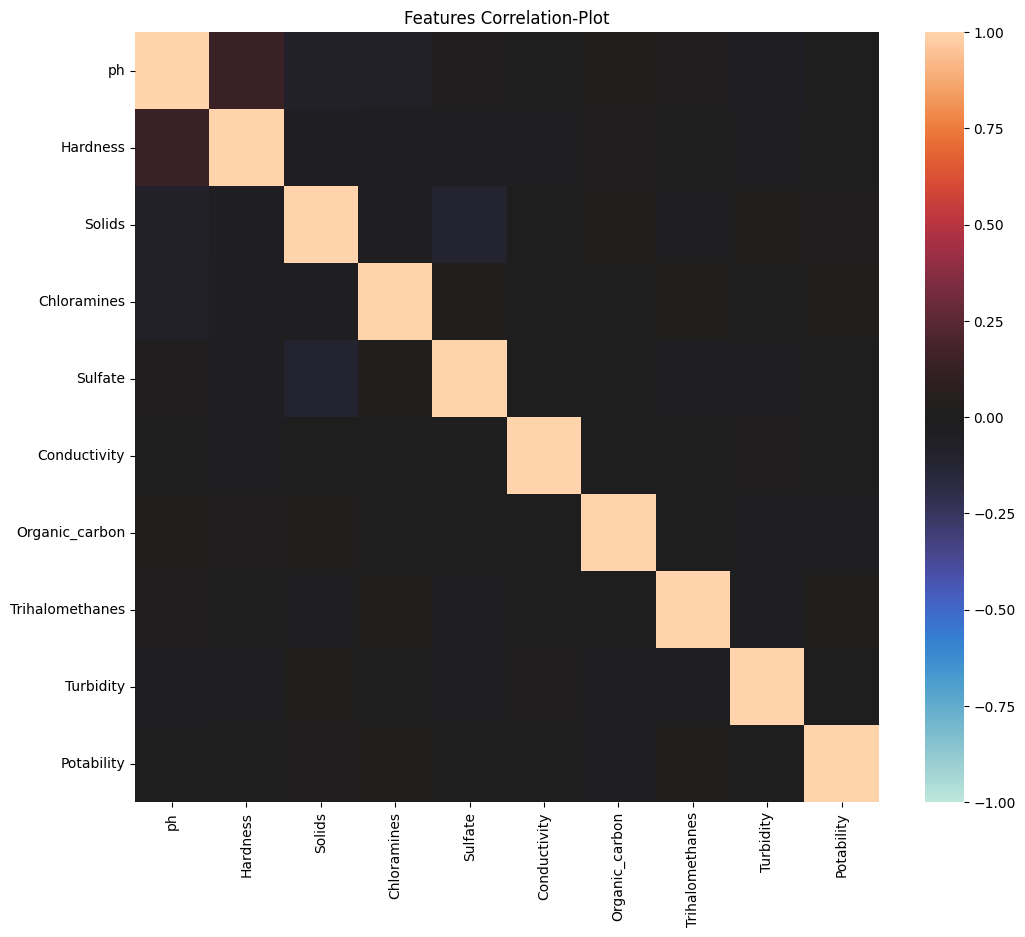

In [26]:
features = data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(data[features].corr(), vmin=-1, vmax=1, center=0) #,
plt.show()

# Import pycaret library and comparing machine learning models

# Model Evaluation

In [38]:
!pip install --upgrade pip
!pip install scikit-learn
!pip install pandas numpy
!pip install pycaret --no-deps
!pip install -U ipywidgets

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)


Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires category-encoders>=2.4.0, which is not installed.
pycaret 3.3.2 requires imbalanced-learn>=0.12.0, which is not installed.
pycaret 3.3.2 requires lightgbm>=3.0.0, which is not installed.
pycaret 3.3.2 requires matplotlib<3.8.0, which is not installed.
pycaret 3.3.2 requires plotly-resampler>=0.8.3.1, which is not installed.
pycaret 3.3.2 requires pmdarima>=2.0.4, which is not installed.
pycaret 3.3.2 requires pyod>=1.1.3, which is not installed.
pycaret 3.3.2 requires scikit-plot>=0.3.7, which is not installed.
pycaret 3.3.2 requires sktime==0.26.0, which is not installed.
pycaret 3.3.2 requires statsmodels>=0.12.1, which is not installed.
pycaret 3.3.2 requires tbats>=1.1.3, which is not installed.
pycaret 3.3.2 requires yellowbrick>=1.4, which is not installed.


In [36]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyod-2.0.3-py3-none-any.whl
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached category_encoders-2.8.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached matplotlib-3.7.5-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-win

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\srija\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Check the permissions.



In [34]:
from pycaret.classification import *
clf = setup(data, target='Potability', session_id=781)
compare_models()

ModuleNotFoundError: No module named 'pycaret'

In [39]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X = data.drop('Potability', axis=1)
y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Model: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model
import joblib
joblib.dump(rf_model, 'water_potability_model.pkl')

Accuracy of the Random Forest Model: 0.6572

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.77       331
           1       0.59      0.26      0.36       197

    accuracy                           0.66       528
   macro avg       0.63      0.58      0.57       528
weighted avg       0.64      0.66      0.62       528



['water_potability_model.pkl']

In [29]:
from pycaret.classification import *
from sklearn.metrics import accuracy_score

clf = setup(data, target='Potability', session_id=786, verbose=False)
model = create_model('rf')

predictions = predict_model(model, data=data)

true_labels = data['Potability']
predicted_labels = predictions['prediction_label']

true_labels = true_labels.astype(int)
predicted_labels = predicted_labels.astype(int)

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy of the Random Forest Model:", accuracy)

NameError: name 'setup' is not defined

In [28]:
new_predictions = predict_model(model, data=data.iloc[[55]])

print("Prediction on new data:")
print(new_predictions[['prediction_label']])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


Prediction on new data:
    prediction_label
72                 0


In [2]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\srija\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import joblib
joblib.dump(model, 'water_potability_model.pkl')


NameError: name 'model' is not defined